# **Pandas**

In [71]:
#imports

import pandas as pd
import numpy as np

# **Series**

In [72]:
#Series (Creating simple series from a list)
#first column is the label, second the values we defined

a = [1, 3, 7]

myvar = pd.Series(a)

myvar

0    1
1    3
2    7
dtype: int64

In [73]:
#Access a specific value using label

myvar[1]

3

In [74]:
#Name own labels/index

a = [1, 3, 7]

myvar = pd.Series(a, index = ["a", "b",  "c"])

myvar

a    1
b    3
c    7
dtype: int64

In [75]:
#Access a specific value using label

myvar["b"]

3

In [76]:
#Creating series with dictionary (key/value object)

d = {"d": 5, "e": 7, "f": 9}

myvar = pd.Series(d)

print (d)
myvar

{'d': 5, 'e': 7, 'f': 9}


d    5
e    7
f    9
dtype: int64

In [77]:
#Access a specified value using label

myvar["d"]

5

In [78]:
#Access more than one value using label

myvar[["d", "e"]]

d    5
e    7
dtype: int64

In [79]:
#Get the shape of the series

myvar.shape

(3,)

In [80]:
#Get all values that are bigger than 5 from the series

myvar[myvar > 5]

e    7
f    9
dtype: int64

In [81]:
# changing based on the index

print('Old value:', myvar['e'])
myvar['e'] = 17
print('New value:', myvar['e'])

Old value: 7
New value: 17


# **Dataframe**




In [82]:
#Create a random array of size 3x2 where the values are within 10

np_array = np.random.randint(10, size=(3,2))
np_array

array([[9, 8],
       [5, 1],
       [7, 8]])

In [83]:
#Create a dataframe with this array
#column name first row, label first column

df = pd.DataFrame(np_array)
df

,0,1
0,9,8
1,5,1
2,7,8


In [84]:
#Give the columns a name

df = pd.DataFrame(np_array, columns=["col1", "col2"])
df

,col1,col2
0,9,8
1,5,1
2,7,8


In [85]:
#Give the rows a name using index

df = pd.DataFrame(np_array, columns=["col1", "col2"], index=["row1", "row2", "row3"])
df

,col1,col2
row1,9,8
row2,5,1
row3,7,8


In [86]:
#Print a value of a specific column and specific row using iloc and loc
df['col1'].iloc[0]     #iloc selects based on the index location

9

In [87]:
df['col1'].loc["row3"]  #loc selects based on the index value/name

7

In [88]:
#Print only the values of this dataframe (which is the array)

df.values

array([[9, 8],
       [5, 1],
       [7, 8]])

In [89]:
#Creating dataframe with a dictionary

data = {
    "a": ["Tom Jones", "Anna Smith", "John williams", "Alice mILLER"],
    "b": [25, 19, 21, 23]
}

df = pd.DataFrame(data)

df

,a,b
0,Tom Jones,25
1,Anna Smith,19
2,John williams,21
3,Alice mILLER,23


In [90]:
#rename columns

df.rename(columns = {"a":"Name", "b":"Age"}, inplace=True) #inplace=True in order to override the existing df it is false by default
df

,Name,Age
0,Tom Jones,25
1,Anna Smith,19
2,John williams,21
3,Alice mILLER,23


In [91]:
#Print values of a specific column
df['Age']

0    25
1    19
2    21
3    23
Name: Age, dtype: int64

In [92]:
#Print from beginning to specific row
df[:2]
#Column
#df[2:]

,Name,Age
0,Tom Jones,25
1,Anna Smith,19


In [93]:
#Another way to select row and column with loc

df.loc[1, "Name"]    #by name of the row and column

'Anna Smith'

In [94]:
#Another way to select row and column with iloc

df.iloc[1, 0]        #by number of the row and column

'Anna Smith'

In [95]:
#Print truth values for all rows where age is greater than 20

df["Age"]>20

0     True
1    False
2     True
3     True
Name: Age, dtype: bool

In [96]:
#Print the information in these true rows instead of the truth values

df[df["Age"]>20]

,Name,Age
0,Tom Jones,25
2,John williams,21
3,Alice mILLER,23


In [97]:
df[(df["Age"]>20) & (df["Age"]<24)]

,Name,Age
2,John williams,21
3,Alice mILLER,23


In [98]:
#Assign results to new dataframe

new_df = df[(df["Age"]>20) & (df["Age"]<24)]
new_df

,Name,Age
2,John williams,21
3,Alice mILLER,23


In [99]:
#Loop through each row
for i in range(len(df)) :
  print(df.loc[i, "Name"])

Tom Jones
Anna Smith
John williams
Alice mILLER


In [100]:
#Loop through each row and print if age is greater than 20
for i in range(len(df)) :
  if (df.loc[i,"Age"]>20):
    print(df.loc[i, "Name"])

Tom Jones
John williams
Alice mILLER


In [101]:
# changing values using boolean logic

df[df["Age"] < 25]
print('\n')

df.loc[df.Age < 25, "Age"] = 20
df[df["Age"] < 25]

,Name,Age
1,Anna Smith,20
2,John williams,20
3,Alice mILLER,20


In [102]:
#Create dataframe from two series (a pandas dataframe is equivalent to a collection of pandas series with the same index)

series_a = pd.Series(["Anna", "Tom", "Alice"])
series_b = pd.Series([23,21,24])

df2 = pd.DataFrame({"Name": series_a, "Age": series_b})
df2

,Name,Age
0,Anna,23
1,Tom,21
2,Alice,24


# **Loading external data sources into dataframe**

In [103]:
#Read from csv file

temp_df = pd.read_csv("DATA/Herning_temperature.csv")
temp_df

,month,min_T,max_T,avg_T,Unnamed: 4,Unnamed: 5
0,1,-1.2,4.2,NaN,NaN,NaN
1,2,-1.8,4.7,NaN,NaN,NaN
2,3,0.3,6.1,NaN,NaN,NaN
3,4,2.6,10.2,NaN,NaN,NaN
4,5,7.5,17.4,NaN,NaN,NaN
5,6,12.6,19.1,NaN,NaN,NaN
6,7,12.8,19.6,NaN,NaN,NaN
7,8,13.1,21.1,NaN,NaN,NaN
8,9,10.1,18.3,NaN,NaN,NaN
9,10,7.4,16.1,NaN,NaN,NaN


In [104]:
#Read from csv file with seperator (, by default)

temp_df2 = pd.read_csv("DATA/Herning_temperature.csv", sep = ",") #not needed as it is by default this
temp_df2

,month,min_T,max_T,avg_T,Unnamed: 4,Unnamed: 5
0,1,-1.2,4.2,NaN,NaN,NaN
1,2,-1.8,4.7,NaN,NaN,NaN
2,3,0.3,6.1,NaN,NaN,NaN
3,4,2.6,10.2,NaN,NaN,NaN
4,5,7.5,17.4,NaN,NaN,NaN
5,6,12.6,19.1,NaN,NaN,NaN
6,7,12.8,19.6,NaN,NaN,NaN
7,8,13.1,21.1,NaN,NaN,NaN
8,9,10.1,18.3,NaN,NaN,NaN
9,10,7.4,16.1,NaN,NaN,NaN


In [105]:
#Load excel file

class_df = pd.read_excel("DATA/Groups_python.xlsx")
class_df

,Group,Name
0,1,"Andersen, Magnus Sten"
1,1,"Braun, Kasper Dupont Toft"
2,1,"Brüssow, Alexander Benjamin"
3,1,"Campiti, Giulio"
4,1,"Carstensen, Jeppe Lykke"
5,2,"Christensen, Lærke Dalsgaard"
6,2,"Crull, Simon Lucas"
7,2,"Fonager, Mads"
8,2,"Górka, Monika Maja"
9,2,"Hallum, Mette"


In [106]:
#Define index column, and type of data in column

class_df1 = pd.read_excel("DATA/Groups_python.xlsx", index_col=1, dtype={"Group": float})
class_df1

#index_col=1: This argument specifies that the second column (index 1, since Python uses zero-based indexing) in the Excel file should be used as the index of the DataFrame. This means the values in that column will become the row labels in class_df1, making it easier to access and analyze the data.
#dtype={"Group": float}: This argument ensures that the column named "Group" in the DataFrame is treated as floating-point numbers. This is important for numerical calculations and analysis later on.


,Group
Name,
"Andersen, Magnus Sten",1.0
"Braun, Kasper Dupont Toft",1.0
"Brüssow, Alexander Benjamin",1.0
"Campiti, Giulio",1.0
"Carstensen, Jeppe Lykke",1.0
"Christensen, Lærke Dalsgaard",2.0
"Crull, Simon Lucas",2.0
"Fonager, Mads",2.0
"Górka, Monika Maja",2.0


# **Basic dataframe manipulation**

In [107]:
#Get basic information of dataframe
# Herning temperature csv file

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       12 non-null     int64  
 1   min_T       12 non-null     float64
 2   max_T       12 non-null     float64
 3   avg_T       0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 708.0 bytes


In [108]:
#Drop second last column

del temp_df["Unnamed: 4"]
temp_df

,month,min_T,max_T,avg_T,Unnamed: 5
0,1,-1.2,4.2,NaN,NaN
1,2,-1.8,4.7,NaN,NaN
2,3,0.3,6.1,NaN,NaN
3,4,2.6,10.2,NaN,NaN
4,5,7.5,17.4,NaN,NaN
5,6,12.6,19.1,NaN,NaN
6,7,12.8,19.6,NaN,NaN
7,8,13.1,21.1,NaN,NaN
8,9,10.1,18.3,NaN,NaN
9,10,7.4,16.1,NaN,NaN


In [109]:
#Drop last column in different way

temp_df = temp_df.drop(columns=["Unnamed: 5"])  #Possible to drop multiple columns at ones with comma
temp_df

,month,min_T,max_T,avg_T
0,1,-1.2,4.2,NaN
1,2,-1.8,4.7,NaN
2,3,0.3,6.1,NaN
3,4,2.6,10.2,NaN
4,5,7.5,17.4,NaN
5,6,12.6,19.1,NaN
6,7,12.8,19.6,NaN
7,8,13.1,21.1,NaN
8,9,10.1,18.3,NaN
9,10,7.4,16.1,NaN


In [110]:
#list first 5 rows
#The code temp_df.head() is the most common way to display the first 5 rows of a Pandas DataFrame temp_df.

temp_df.head()

,month,min_T,max_T,avg_T
0,1,-1.2,4.2,NaN
1,2,-1.8,4.7,NaN
2,3,0.3,6.1,NaN
3,4,2.6,10.2,NaN
4,5,7.5,17.4,NaN


In [111]:
#list first 3 rows
temp_df[:3]

,month,min_T,max_T,avg_T
0,1,-1.2,4.2,NaN
1,2,-1.8,4.7,NaN
2,3,0.3,6.1,NaN


In [112]:
temp_df.iloc[:3] #iloc also does the same job by referring to the actual row positions

,month,min_T,max_T,avg_T
0,1,-1.2,4.2,NaN
1,2,-1.8,4.7,NaN
2,3,0.3,6.1,NaN


In [113]:
temp_df.loc[:3] #loc works similarly but uses the index values (which in this case are numbers 0-11) which can be changed to any arbitrary series (like other columns in the dataframe). Example to follow below.
#loc also behaves in a manner different from iloc and normal slicing by also including the last row matching the condition (so the same expression 0:3 gives 3 columns for iloc and 4 for loc)

,month,min_T,max_T,avg_T
0,1,-1.2,4.2,NaN
1,2,-1.8,4.7,NaN
2,3,0.3,6.1,NaN
3,4,2.6,10.2,NaN


In [114]:
#Fill out the avg_T column

temp_df["avg_T"] = (temp_df["min_T"] + temp_df["max_T"] ) / 2
temp_df

,month,min_T,max_T,avg_T
0,1,-1.2,4.2,1.50
1,2,-1.8,4.7,1.45
2,3,0.3,6.1,3.20
3,4,2.6,10.2,6.40
4,5,7.5,17.4,12.45
5,6,12.6,19.1,15.85
6,7,12.8,19.6,16.20
7,8,13.1,21.1,17.10
8,9,10.1,18.3,14.20
9,10,7.4,16.1,11.75


In [115]:
#Print the values of a specific column

temp_df['min_T']

0     -1.2
1     -1.8
2      0.3
3      2.6
4      7.5
5     12.6
6     12.8
7     13.1
8     10.1
9      7.4
10     2.7
11     3.6
Name: min_T, dtype: float64

In [116]:
#Do the same in a different way

temp_df.min_T

0     -1.2
1     -1.8
2      0.3
3      2.6
4      7.5
5     12.6
6     12.8
7     13.1
8     10.1
9      7.4
10     2.7
11     3.6
Name: min_T, dtype: float64

In [117]:
#Print values of more than one column

temp_df[['min_T','max_T']]

,min_T,max_T
0,-1.2,4.2
1,-1.8,4.7
2,0.3,6.1
3,2.6,10.2
4,7.5,17.4
5,12.6,19.1
6,12.8,19.6
7,13.1,21.1
8,10.1,18.3
9,7.4,16.1


In [118]:
#Get the mean value of a column

temp_df['min_T'].mean()

5.808333333333333

In [119]:
#Get the median value

temp_df['min_T'].median()

5.5

In [120]:
#Descriptive statistics
temp_df.describe()

,month,min_T,max_T,avg_T
count,12.000000,12.000000,12.000000,12.000000
mean,6.500000,5.808333,12.708333,9.258333
std,3.605551,5.511716,6.453253,5.940991
min,1.000000,-1.800000,4.200000,1.450000
25%,3.750000,2.025000,6.925000,4.850000
50%,6.500000,5.500000,13.150000,9.075000
75%,9.250000,10.725000,18.500000,14.612500
max,12.000000,13.100000,21.100000,17.100000


In [121]:
#Get the shape
temp_df.shape   #12 rows and 4 columns

(12, 4)

In [122]:
#Sort according to minimum temperature
min_temp_df = temp_df.sort_values('min_T')
#note that min_temp_df is a new dataframe which essentially copied the result of the sorting operation on temp_df
min_temp_df

,month,min_T,max_T,avg_T
1,2,-1.8,4.7,1.45
0,1,-1.2,4.2,1.50
2,3,0.3,6.1,3.20
3,4,2.6,10.2,6.40
10,11,2.7,8.5,5.60
11,12,3.6,7.2,5.40
9,10,7.4,16.1,11.75
4,5,7.5,17.4,12.45
8,9,10.1,18.3,14.20
5,6,12.6,19.1,15.85


In [123]:
#Add a new column with the names of the months
month_name_list = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
temp_df['month_name'] = month_name_list
temp_df

,month,min_T,max_T,avg_T,month_name
0,1,-1.2,4.2,1.50,jan
1,2,-1.8,4.7,1.45,feb
2,3,0.3,6.1,3.20,mar
3,4,2.6,10.2,6.40,apr
4,5,7.5,17.4,12.45,may
5,6,12.6,19.1,15.85,jun
6,7,12.8,19.6,16.20,jul
7,8,13.1,21.1,17.10,aug
8,9,10.1,18.3,14.20,sep
9,10,7.4,16.1,11.75,oct


In [124]:
temp_df.set_index('month_name') #This set the index to the column 'month_name'
print(temp_df) #you won't see any change here
temp_temp_df = temp_df.set_index('month_name')
print(temp_temp_df) #this works
#now how do you change the index in the dataframe itself? One easy way is to assign the result back to the dataframe variable itself - temp_df = temp_df.set_index('month_name')
#Another option is to use inplace=True which changes the original dataframe
temp_df.set_index('month_name', inplace=True)
print(temp_df) #the index has been changed

    month  min_T  max_T  avg_T month_name
0       1   -1.2    4.2   1.50        jan
1       2   -1.8    4.7   1.45        feb
2       3    0.3    6.1   3.20        mar
3       4    2.6   10.2   6.40        apr
4       5    7.5   17.4  12.45        may
5       6   12.6   19.1  15.85        jun
6       7   12.8   19.6  16.20        jul
7       8   13.1   21.1  17.10        aug
8       9   10.1   18.3  14.20        sep
9      10    7.4   16.1  11.75        oct
10     11    2.7    8.5   5.60        nov
11     12    3.6    7.2   5.40        dec
            month  min_T  max_T  avg_T
month_name                            
jan             1   -1.2    4.2   1.50
feb             2   -1.8    4.7   1.45
mar             3    0.3    6.1   3.20
apr             4    2.6   10.2   6.40
may             5    7.5   17.4  12.45
jun             6   12.6   19.1  15.85
jul             7   12.8   19.6  16.20
aug             8   13.1   21.1  17.10
sep             9   10.1   18.3  14.20
oct            10    7.4 

In [125]:
#Let us revisit the loc function again which uses the index value (earlier it was integer but now it is a string)
temp_df.loc[:'apr'] #Equivalent for iloc in this case is temp_df.iloc[0] which always uses only the integet locations

#For a detailed explanation on the difference between loc and iloc see - https://stackoverflow.com/a/31593712

,month,min_T,max_T,avg_T
month_name,,,,
jan,1,-1.2,4.2,1.50
feb,2,-1.8,4.7,1.45
mar,3,0.3,6.1,3.20
apr,4,2.6,10.2,6.40


In [126]:
#How to reset the index back to the old integer based one?
temp_df.reset_index(inplace=True)
print(temp_df) #the index has been changed back to normal and 'month_name' has become a column again

   month_name  month  min_T  max_T  avg_T
0         jan      1   -1.2    4.2   1.50
1         feb      2   -1.8    4.7   1.45
2         mar      3    0.3    6.1   3.20
3         apr      4    2.6   10.2   6.40
4         may      5    7.5   17.4  12.45
5         jun      6   12.6   19.1  15.85
6         jul      7   12.8   19.6  16.20
7         aug      8   13.1   21.1  17.10
8         sep      9   10.1   18.3  14.20
9         oct     10    7.4   16.1  11.75
10        nov     11    2.7    8.5   5.60
11        dec     12    3.6    7.2   5.40


# **Plotting with matplotlib**

In [127]:
#import library

import matplotlib.pyplot as plt

In [128]:
#Create list with the values you want to plot
month_list =  temp_df['month'].tolist()
min_list = temp_df['min_T'].tolist()
max_list = temp_df['max_T'].tolist()
zero_list = [0 for i in range(1,13)] #We generate a list of size 12 filled with zeroes to draw a line showing the zero temperature line

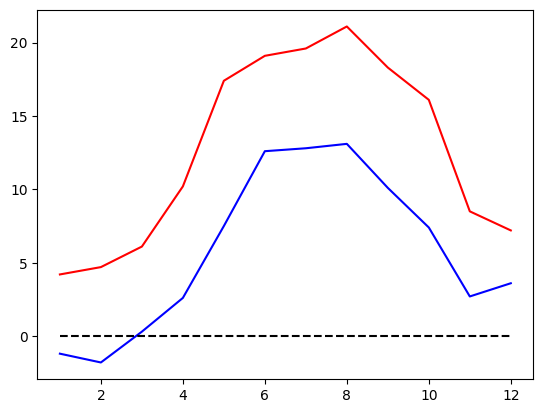

In [129]:
plt.plot(month_list, min_list,'b-', month_list, max_list,'r-', month_list, zero_list,'k--') #b- stands for blue and type of line etc.

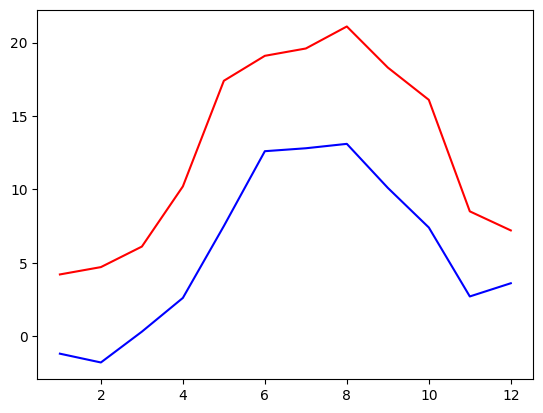

In [130]:
#Or just use the datframe columns directly
plt.plot(temp_df["month"], temp_df["min_T"], 'b-', temp_df["month"], temp_df["max_T"], 'r-')

Text(0, 0.5, 'Temperature')

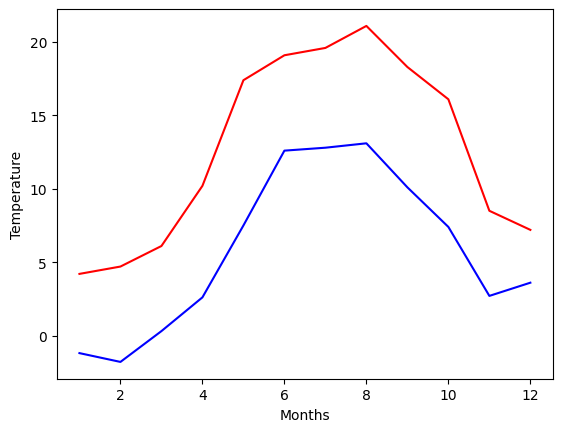

In [131]:
#Show axes labels
plt.plot(temp_df["month"], temp_df["min_T"], 'b-', temp_df["month"], temp_df["max_T"], 'r-')
plt.xlabel("Months")
plt.ylabel("Temperature")

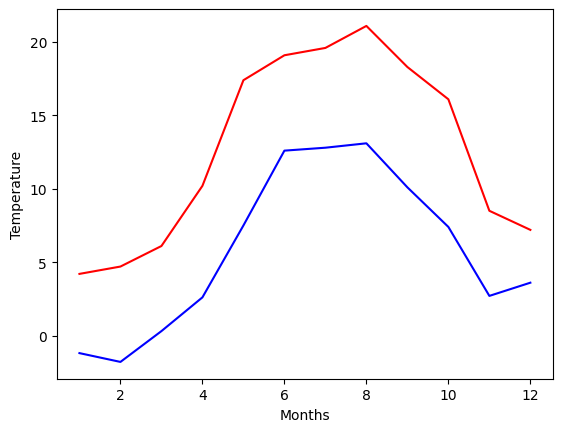

In [132]:
#Another way is to combine the graphs by plotting them separately and then drawing them together by calling the show() function at the end
plt.plot(temp_df["month"], temp_df["min_T"], 'b-')
plt.plot(temp_df["month"], temp_df["max_T"], 'r-')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.show()

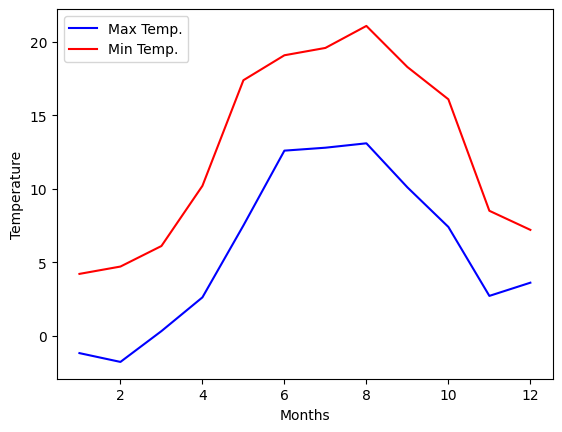

In [133]:
#Adding a legend
plt.plot(temp_df["month"], temp_df["min_T"], 'b-', label = 'Max Temp.')
plt.plot(temp_df["month"], temp_df["max_T"], 'r-', label = 'Min Temp.')
plt.xlabel("Months")
plt.ylabel("Temperature")
plt.legend(loc="upper left") #For other options see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
plt.show()

# **Plotting with pandas**

<Axes: >

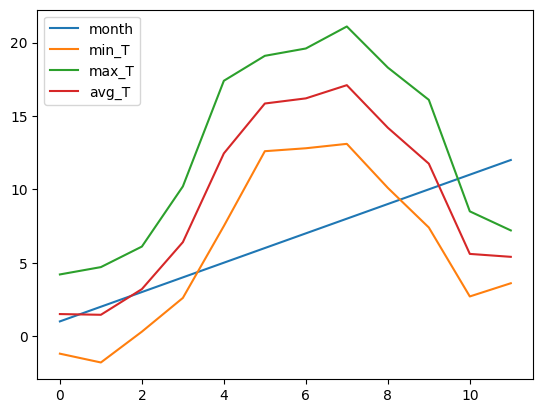

In [134]:
#Plot using pandas

temp_df.plot()

<Axes: xlabel='month'>

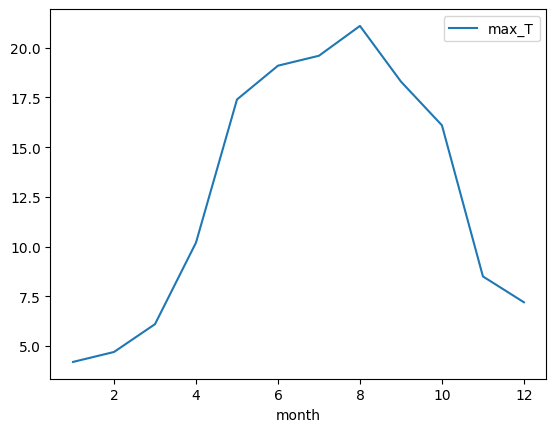

In [135]:
#Define the type of plot and x and y axis
temp_df.plot(kind='line',x='month',y='max_T')

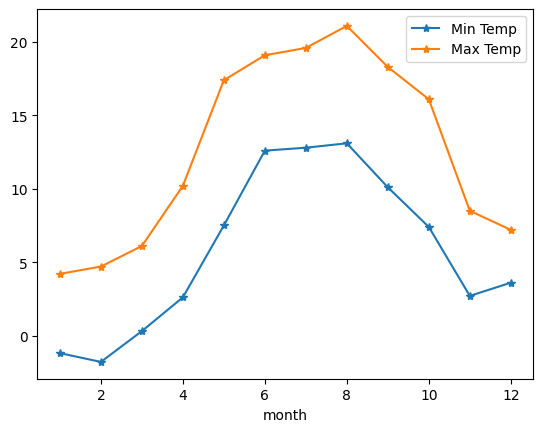

In [136]:
#choose multiple columns for y axix
temp_df.plot(x='month', y=['min_T','max_T'], marker='*').legend(["Min Temp", "Max Temp"]) #Customizing the legend, this works because the plot function returns an axes object which allows for legends to be set - https://matplotlib.org/stable/api/axes_api.html

<Axes: xlabel='month', ylabel='avg_T'>

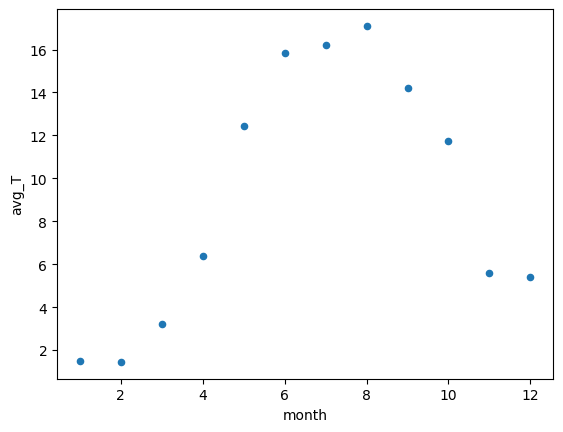

In [137]:
#Scatter plot

temp_df.plot(kind = "scatter", x = "month", y = "avg_T")

<Axes: ylabel='Frequency'>

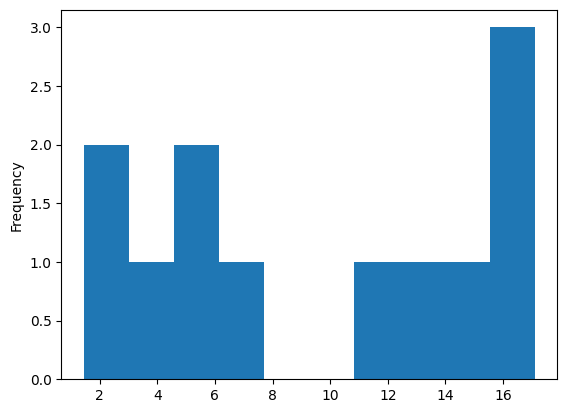

In [138]:
#Histogram

temp_df.avg_T.plot(kind = "hist")

# **Profiling**

In [139]:
from pandas_profiling import ProfileReport

In [140]:
profile = ProfileReport(temp_df)
profile.to_notebook_iframe()
profile.to_file("DATA/temp_profileReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]